# 군집

분류와 달리 정답 레이블이 없는 문제.

- 분류 : `K-NN`
- 군집 : `K-Means`

데이터를 몇 개의 묶음(클러스터, Cluster)으로 나눌 것인지를 하이퍼 파라미터로 결정해야 하며 이 값이 `k-means`의 $k$가 됨

데이터 전처리 단계에서 라벨링을 위해 사용하기도 함. 

군집은 가능한 표준화 시키기

## #01. 패키지 참조

In [20]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# 분류 알고리즘 관련 패키지
from sklearn.cluster import KMeans

# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings('ignore')

# 표준화
from sklearn.preprocessing import MinMaxScaler

# 실루엣점수
from sklearn.metrics import silhouette_score

## #02. 데이터 가져오기

** 게임 유저 군집화 **

게임 이용시간(time spent)과 레벨(game level)을 활용하여 4개의 군집으로 나누기

1. 오래해서 잘하는 애
2. 오래했는데도 못하는 애
3. 잠깐 했는데 잘하는 애
4. 잠깐 해서 못하는 애

In [2]:
origin = read_excel('https://data.hossam.kr/G02/game_usage.xlsx')
origin

,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109
...,...,...
95,47,939
96,50,485
97,13,916
98,79,235


## #03. 데이터 살펴보기

### 게임 이용자의 분포 확인(산점도 그래프)

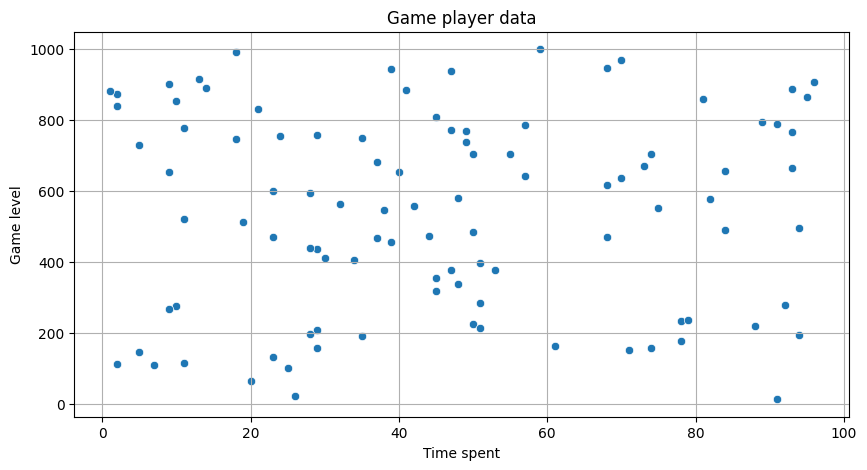

In [3]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='time spent', y='game level')
plt.title('Game player data')
plt.xlabel('Time spent')
plt.ylabel('Game level')
plt.grid()
plt.show()
plt.close()

## #04. 군집화 모델

### 모델 구현

In [4]:
#모델생성
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300, random_state=777) #4개의 군집 값을 임의로 설정 후 10번 반복=> 제일 군집을 잘한 것을 찾아내는 것. 
#훈련
kmeans.fit(origin)
#예측
labels = kmeans.predict(origin)
labels

array([3, 1, 1, 3, 0, 1, 2, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 0, 3, 1, 1, 3,
       0, 1, 0, 3, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 3, 0, 1, 3, 1,
       3, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 3, 0, 1, 3, 2, 0, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 3, 2, 0, 0, 3, 0, 3, 3, 0, 2, 0, 1, 2, 3, 0, 2, 1, 2,
       0, 0, 1, 1, 2, 1, 3, 3, 2, 3, 0, 2])

### 결과를 원본 데이터프레임과 병합

In [5]:
df = origin.copy()
df['label'] = labels
df

,time spent,game level,label
0,39,944,3
1,55,705,1
2,29,757,1
3,59,999,3
4,7,109,0
...,...,...,...
95,47,939,3
96,50,485,2
97,13,916,3
98,79,235,0


### 결과 시각화

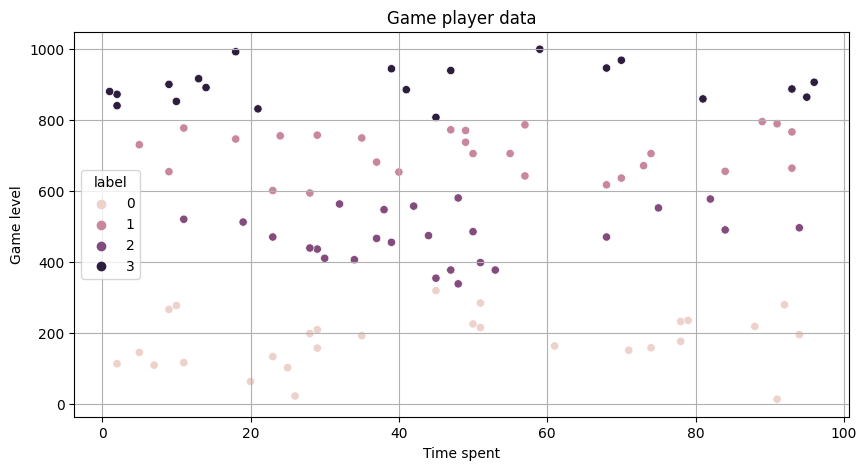

In [6]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=df, x='time spent', y='game level', hue='label')
plt.title('Game player data')
plt.xlabel('Time spent')
plt.ylabel('Game level')
plt.grid()
plt.show()
plt.close()

## #05. 데이터 표준화 적용

![k-means](./res/k-means.png)

### 최대, 최소값 스케일링

In [10]:
scaler = MinMaxScaler()
n_data = scaler.fit_transform(origin)

print("각 열의 평균:", n_data[:,0].mean(), n_data[:,1].mean())
print("각 열의 최소값:", n_data[:,0].min(), n_data[:,1].min())
print("각 열의 최대값:", n_data[:,0].max(), n_data[:,1].max())

각 열의 평균: 0.4731578947368421 0.5324949290060852
각 열의 최소값: 0.0 0.0
각 열의 최대값: 1.0 1.0


### 스케일링의 결과를 군집

In [11]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300, random_state=777) 
kmeans.fit(n_data)
labels = kmeans.predict(n_data)
labels

array([3, 1, 3, 1, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 1, 0, 3, 3, 1, 1,
       2, 1, 0, 3, 3, 0, 0, 0, 1, 3, 0, 0, 1, 3, 0, 0, 0, 3, 0, 1, 3, 1,
       1, 1, 3, 0, 1, 2, 0, 2, 2, 0, 1, 3, 0, 3, 1, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 0, 3, 3, 1, 0, 0, 1, 2, 3, 3, 0, 0, 0, 1, 0, 3, 2, 1, 3, 0,
       0, 2, 3, 1, 0, 3, 1, 3, 0, 3, 2, 0])

### 군집결과를 데이터프레임으로 구성

In [14]:
df = DataFrame(n_data, columns=origin.columns)
df['label'] = labels
df

,time spent,game level,label
0,0.400000,0.944219,3
1,0.568421,0.701826,1
2,0.294737,0.754564,3
3,0.610526,1.000000,1
4,0.063158,0.097363,0
...,...,...,...
95,0.484211,0.939148,3
96,0.515789,0.478702,0
97,0.126316,0.915822,3
98,0.821053,0.225152,2


### 군집 결과 시각화

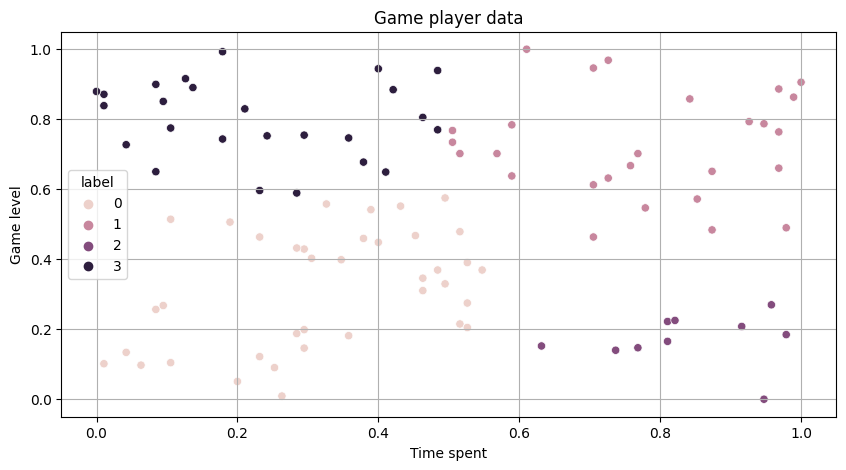

In [15]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=df, x='time spent', y='game level', hue='label')
plt.title('Game player data')
plt.xlabel('Time spent')
plt.ylabel('Game level')
plt.grid()
plt.show()
plt.close()

## #06. 군집의 평가

### Inertia 

K-means 클러스터링의 성능 지표

각 샘플과 중점이 이동하는 자취 사이의 평균 제곱 거리 측정값

이너셔값은 클러스터 수와 반비례 관계

클러스터 수를 늘려가면서 반복적으로 실행하면 값이 점점 작아진다.

클러스터 수가 늘어남에 이너셔가 급격히 감소하고, 어느 지점부터는 완만하게 감소하는 지점이 생기는데 이 지점이 최적 클러스터 수를 의미한다.(=엘보우(Elbow))

In [17]:
iner = [] #inertia값을 저장할 리스트

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=777) 
    kmeans.fit(n_data)
    iner.append(kmeans.inertia_)

iner

[10.150300754112475,
 6.184178180480311,
 4.27870825868831,
 3.1342691797329554,
 2.244563434249514,
 1.8141504615008552,
 1.4833082834444853,
 1.2947314814417967,
 1.1877369641424869]

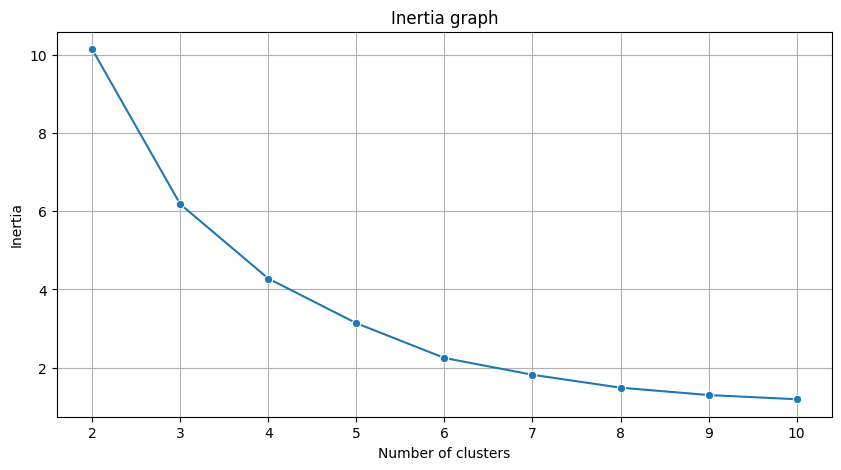

In [18]:
plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,11), y=iner, marker='o')
plt.title('Inertia graph')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()
plt.close()

> x축의 값이 4인 지점부터 감소가 완만하게 진행되는 것으로 보인다. 그러므로 최적의 클러스터 수는 '4'로 판단할 수 있다.

### 실루엣 점수

각 군집간의 거리가 얼마나 효율적으로 분리되었는지를 나타내는 지표

효율적 분리 : 어떤 한 점이 다른 군집과는 멀리 떨어져 있고, 동일 군집끼리는 서로 가깝게 잘 뭉쳐있다는 의미

개별 데이터가 같은 군집과는 얼마나 가깝고, 다른 군집의 데이터와는 얼마나 멀리 분리되어 잇는가를 나타내는 값. 

sklearn은 전체 실루엣 점수의 평균값을 반환하는 `silhouette_score()` 함수를 제공한다. 

리턴값은 `-1~1`의 범위를 가지며 1에 가까울 수록 좋은 군집으로 본다. 

`0` 경우는 클러스터가 겹치는 것을 의미

음수값은 일반적으로 샘플이 잘못된 클러스터에 할당되었음을 의미

> https://studying-haeung.tistory.com/10 (실루엣계수 구하는 방법)

In [21]:
kmeans = KMeans(n_clusters=4, random_state=777) 
kmeans.fit(n_data)
y_pred = kmeans.predict(n_data)
score = silhouette_score(n_data, y_pred)

print("실루엣 점수 : {0:.3f}".format(score))

실루엣 점수 : 0.414


In [27]:
score_list = [] #score_list값을 저장할 리스트

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=777) 
    kmeans.fit(n_data)
    y_pred = kmeans.predict(n_data)
    score = silhouette_score(n_data, y_pred)
    score_list.append(score)

score_list

[0.3617202800675718,
 0.39473417105934466,
 0.4144891907182965,
 0.4318795903949567,
 0.46544130770511294,
 0.4581607045900181,
 0.46061321951846396,
 0.46297169733084376,
 0.4313333259160698]

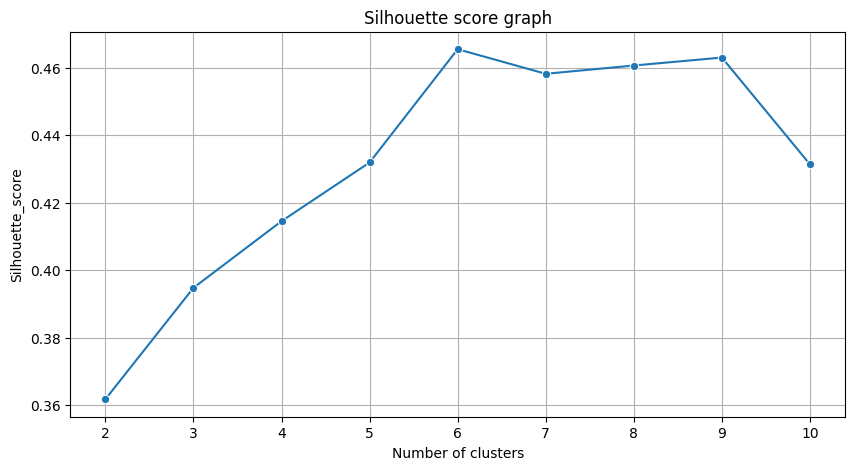

In [28]:
plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,11), y=score_list, marker='o')
plt.title('Silhouette score graph')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_score')
plt.grid()
plt.show()
plt.close()

## #07. 최종 군집 결과

실루엣 점수가 가장 높은 6개의 군집으로 클러스터링을 수행

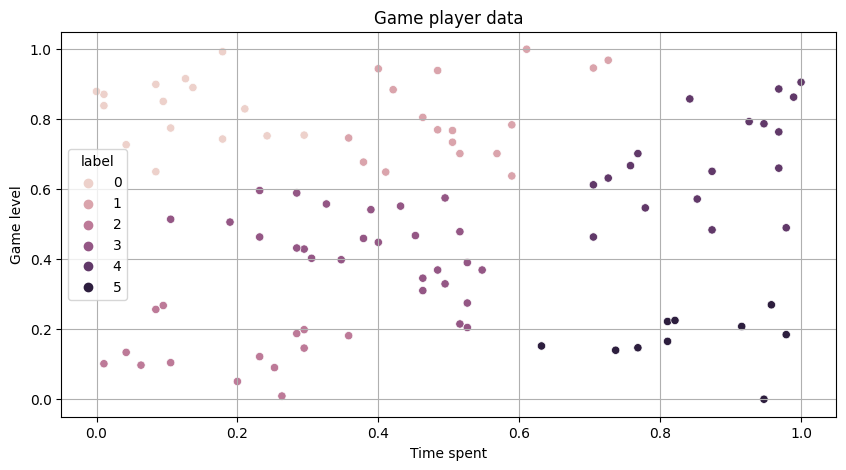

In [30]:
kmeans = KMeans(n_clusters=6, n_init=10, max_iter=300, random_state=777)
kmeans.fit(n_data)
labels = kmeans.predict(n_data)

df = DataFrame(n_data, columns=origin.columns)
df['label'] = labels

plt.figure(figsize=(10,5))
sb.scatterplot(data=df, x='time spent', y='game level', hue='label')
plt.title('Game player data')
plt.xlabel('Time spent')
plt.ylabel('Game level')
plt.grid()
plt.show()
plt.close()